In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
# import sklearn
# print("sklearn version: ", sklearn.__version__)
# assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
print("TF version: ", tf.__version__)
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# GPU test
print("GPU installed: ",tf.test.is_built_with_gpu_support())

# To prevent "CUDNN_STATUS_ALLOC_FAILED" error with GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
    
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")    


TF version:  2.4.0
GPU installed:  True
1 Physical GPUs, 1 Logical GPUs


In [1]:
import numpy as np
import pandas as pd
import os
import time
# import scoring as scoring
import pickle
import gzip
from pyarrow import csv
import csv
# train_path = "D:/2022AIComp_data/train.csv"
# test_path = "D:/2022AIComp_data/test.csv"

#---------------------- Load Train,Test DF
train_pd = pd.read_csv("D:/2022AIComp_data/train.csv")
test_pd = pd.read_csv("D:/2022AIComp_data/test.csv")

print("Train: %s, Test: %s" %(train_pd.shape, test_pd.shape))
train_pd.head()
print(train_pd.iloc[:,0].unique())
# test_pd.head()

Train: (33600, 514), Test: (7820, 514)
['out' 'in' 'normal' 'other' 'noise']


In [2]:
def data_shape(data_li):
    for data in data_li:
        vnames = [name for name in globals() if globals()[name] is data]
        print(vnames[0],'.shape : ',data.shape)
        
X_train = np.array(train_pd.iloc[:,1:])
y_train = train_pd.iloc[:,0].replace(['out','in', 'normal', 'other', 'noise'],[0,1,2,3,4])
# y_train = np.argmax(np.array(pd.get_dummies(train_pd.iloc[:,0])),axis=1)

X_test = np.array(test_pd.iloc[:,1:])
# y_test = np.array(pd.get_dummies(test_pd.iloc[:,0]))


data_shape([X_train,y_train,X_test])
y_train.shape

# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 42, stratify = y_train)

##normalize


# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# # scaler = StandardScaler()
# scaler = MinMaxScaler()
# X_train = scaler.fit(X_train).transform(X_train)

# X_train = X_train/np.max(X_train,axis =1)[:,None]



#크래스 별로 Partition 나눔

for i in range(5):
    globals()['X_'+str(i)] = X_train[y_train==i]


X_sub = [X_0,X_1,X_2,X_3,X_4]
for i in X_sub:
    print(i.shape)

X_train = np.concatenate((X_0,X_1))
print(X_train.shape)
y_label = y_train[:3600]

X_train .shape :  (33600, 513)
y_train .shape :  (33600,)
X_test .shape :  (7820, 513)
(1800, 513)
(1800, 513)
(18000, 513)
(7000, 513)
(5000, 513)
(3600, 513)


## sel feature 1 rms 등

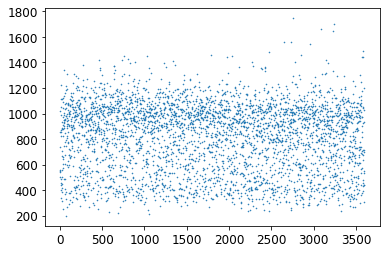

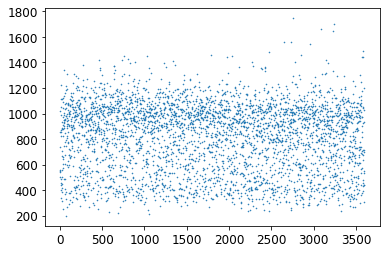

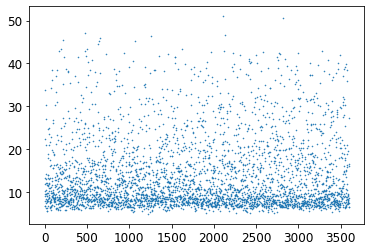

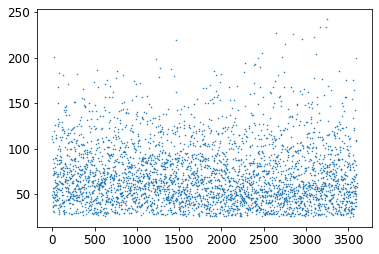

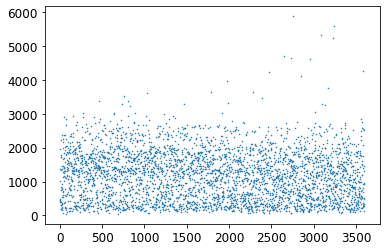

In [6]:
##rms, mean
rms = np.sqrt(np.sum(X_train**2,axis=1))
plt.scatter(np.arange(rms.shape[0]),rms, 0.3)
plt.show()

rms_max = np.sqrt(np.sum(X_train**2,axis=1))/np.max(X_train,axis = 1)
plt.scatter(np.arange(rms.shape[0]),rms, 0.3)
plt.show()

mean_ = np.mean(X_train,axis=1)
plt.scatter(np.arange(mean_.shape[0]),mean_, 0.3)
plt.show()

##rma/ mean
new = rms/mean_
plt.scatter(np.arange(mean_.shape[0]),new, 0.3)
plt.show()
#var
varr=np.var(X_train,axis=1)
plt.scatter(np.arange(np.var(X_train,axis=1).shape[0]),np.var(X_train,axis=1), 0.3)


In [16]:
rms.shape
varr.shape

(3600,)

In [49]:
np.std(rms_max)

0.8708646439335931

In [269]:
# from sklearn.model_selection import train_test_split

# mkde_feature = np.array([rms,rms_max,varr]).T
# print(mkde_feature.shape)
# sel_feature, pts, y_train, y_val =train_test_split(
#     mkde_feature, y_mkde, test_size=0.2, stratify = y_mkde)


# print(sel_feature.shape[0])
# print(pts.shape)
# pts.shape

(3600, 3)
2880
(720, 3)


(720, 3)

In [11]:
mkde_feature = np.array([rms,rms_max,varr]).T
print(mkde_feature.shape)
sel_feature = mkde_feature[:1440]
pts = np.concatenate((mkde_feature[1440:1800],mkde_feature[3240:3600]))
y_train = y_label[:1440]
y_val = np.concatenate((y_label[1440:1800],y_label[3240:3600]))

print(sel_feature.shape)
print(pts.shape)

(3600, 3)
(1440, 3)
(720, 3)


feature num : 3
[262.58777649   0.83533139 715.96165308]
[ 89.99856327   0.28629903 245.38659412]
6.753762183696436e-07
################ pa :  1.0 , th:  6.753762183696436e-07 acc : 
Confusion Matrix
[[177 183]
 [145 215]]
정확도:0.5444444444444444, 정밀도:0.5402010050251256, 재현율:0.5972222222222222
f1 score : 0.5672823218997362


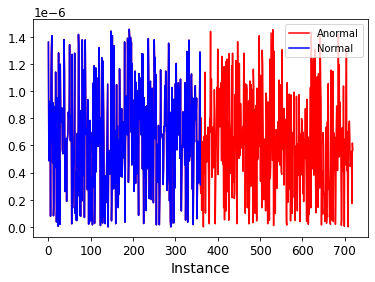

[262.58777649   0.83533139 715.96165308]
[ 89.99856327   0.28629903 245.38659412]
3.939967912613736e-07
################ pa :  1.5 , th:  3.939967912613736e-07 acc : 
Confusion Matrix
[[158 202]
 [124 236]]
정확도:0.5472222222222223, 정밀도:0.5388127853881278, 재현율:0.6555555555555556
f1 score : 0.5914786967418546


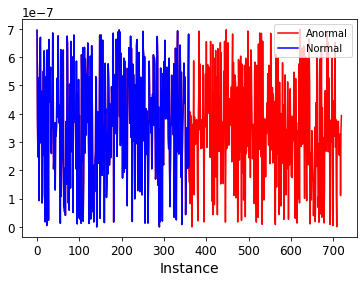

[262.58777649   0.83533139 715.96165308]
[ 89.99856327   0.28629903 245.38659412]
2.3337030674740668e-07
################ pa :  2.0 , th:  2.3337030674740668e-07 acc : 
Confusion Matrix
[[195 165]
 [161 199]]
정확도:0.5472222222222223, 정밀도:0.5467032967032966, 재현율:0.5527777777777778
f1 score : 0.5497237569060772


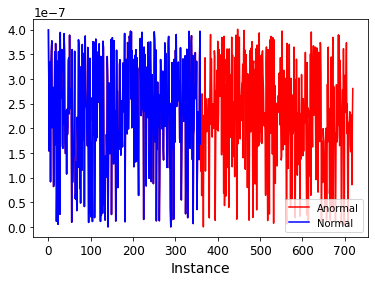

[262.58777649   0.83533139 715.96165308]
[ 89.99856327   0.28629903 245.38659412]
2.0577236899702447e-07
################ pa :  2.5 , th:  2.0577236899702447e-07 acc : 
Confusion Matrix
[[122 238]
 [ 89 271]]
정확도:0.5458333333333333, 정밀도:0.5324165029469549, 재현율:0.7527777777777778
f1 score : 0.6237054085155351


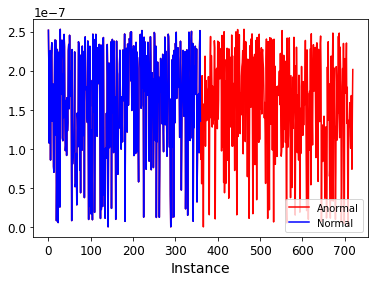

[262.58777649   0.83533139 715.96165308]
[ 89.99856327   0.28629903 245.38659412]
1.4987805716918632e-07
################ pa :  3.0 , th:  1.4987805716918632e-07 acc : 
Confusion Matrix
[[112 248]
 [ 75 285]]
정확도:0.5513888888888889, 정밀도:0.5347091932457786, 재현율:0.7916666666666666
f1 score : 0.6382978723404255


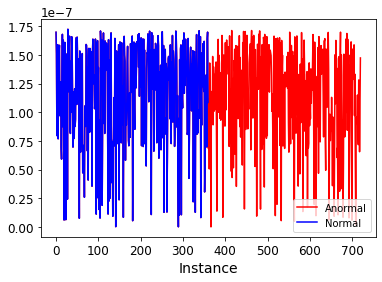

[262.58777649   0.83533139 715.96165308]
[ 89.99856327   0.28629903 245.38659412]
1.0375235080347756e-07
################ pa :  3.5 , th:  1.0375235080347756e-07 acc : 
Confusion Matrix
[[147 213]
 [115 245]]
정확도:0.5444444444444444, 정밀도:0.5349344978165939, 재현율:0.6805555555555556
f1 score : 0.5990220048899756


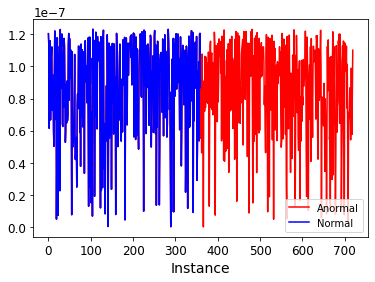

[262.58777649   0.83533139 715.96165308]
[ 89.99856327   0.28629903 245.38659412]
7.958851866003073e-08
################ pa :  4.0 , th:  7.958851866003073e-08 acc : 
Confusion Matrix
[[141 219]
 [111 249]]
정확도:0.5416666666666666, 정밀도:0.532051282051282, 재현율:0.6916666666666667
f1 score : 0.6014492753623187


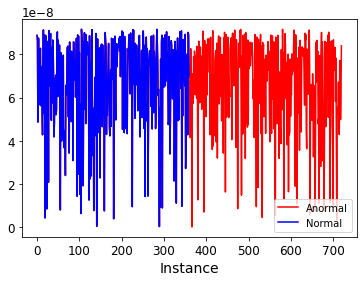

[262.58777649   0.83533139 715.96165308]
[ 89.99856327   0.28629903 245.38659412]
6.259409556388792e-08
################ pa :  4.5 , th:  6.259409556388792e-08 acc : 
Confusion Matrix
[[127 233]
 [100 260]]
정확도:0.5375, 정밀도:0.5273833671399595, 재현율:0.7222222222222222
f1 score : 0.6096131301289567


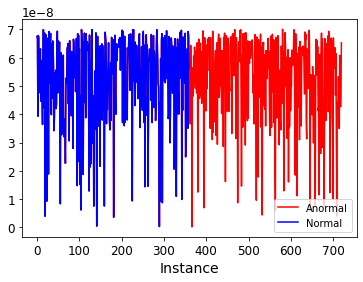

In [14]:
import statsmodels.api as sm

### threshold 결정
feature_num = sel_feature.shape[1]
print('feature num :',feature_num)
import matplotlib.pyplot as plt

label = y_val

for i in np.arange(1,5,0.5):
    thresh = 0
    max_acc = 0
    max_acc_pred = []
    var_type = 'c' * feature_num
    

    std_feature = np.std(sel_feature, axis=0)
    print(std_feature)
    d = feature_num
    train_length = sel_feature.shape[0]
    c = (4 / (d + 2) / train_length) ** (1 / (d + 4))

    pa =i
    bw = std_feature * c
    print(bw)
    # bw = bw.transpose()

    dens = sm.nonparametric.KDEMultivariate(
        data=sel_feature, var_type=var_type, bw=bw * pa)
    file_pd = dens.pdf(pts)
    file_pd.shape
#     print(file_pd)

    th_li = np.sort(np.unique(file_pd))
    for j in th_li:
#         print(j)
        pred = file_pd.copy()
        pred[file_pd<=j]=1
        pred[file_pd>j]=0
#         print(pred)
        acc = len(pred[pred ==label])/len(pts)
        if acc>max_acc:
            thresh = j
            max_acc = acc
            max_acc_pred = pred
    print(thresh)
    

    print('################ pa : ', pa, ', th: ',thresh, 'acc : ')
    get_clf_eval(label, max_acc_pred)        
    f1 = f1_score(label, max_acc_pred)
    print('f1 score :', f1)
    plt.plot(file_pd,'r', label = "Anormal")
    plt.plot(file_pd[:360],'b', label = "Normal")
    plt.xlabel('Instance')
    plt.legend()
    plt.show()
    


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))


In [85]:
X_train.shape
y_train.shape

(3600,)

## 전체 feature 513

In [140]:
X_train.shape

(3600, 513)

In [18]:
def make_mkde_data(X,label):

    t = X[:1440,1:]
    print(np.concatenate((X[:1440],X[1800:3240])).shape)
    pts = np.concatenate((X[1440:1800,1:],X[3240:3600,1:]))
    y_train = label[:1440]
    y_val = np.concatenate((label[1440:1800],label[3240:3600]))
    return t ,pts ,y_train ,y_val


def data_shape(data_li):
    for data in data_li:
        vnames = [name for name in globals() if globals()[name] is data]
        print(vnames[0],'.shape : ',data.shape)

In [19]:
sel_feature, pts  ,y_train,y_val = make_mkde_data(X_train,y_label)
data_shape([sel_feature,pts,y_train,y_val])

(2880, 513)
sel_feature .shape :  (1440, 512)
pts .shape :  (720, 512)
y_train .shape :  (1440,)
y_val .shape :  (720,)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0


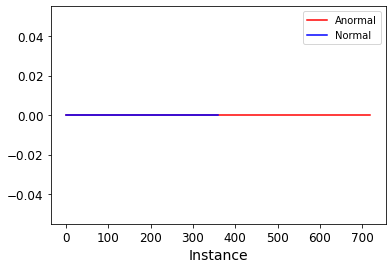

C:\Users\GJ\anaconda3\envs\2022AIComp\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0


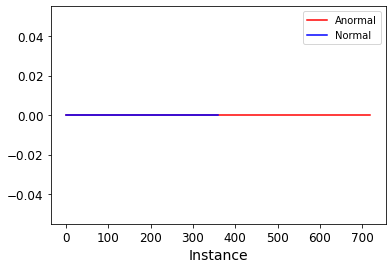

C:\Users\GJ\anaconda3\envs\2022AIComp\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0


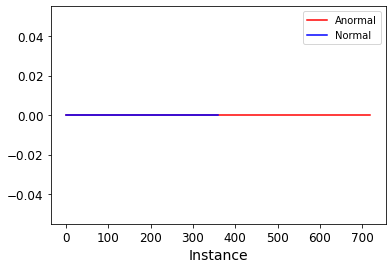

C:\Users\GJ\anaconda3\envs\2022AIComp\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0


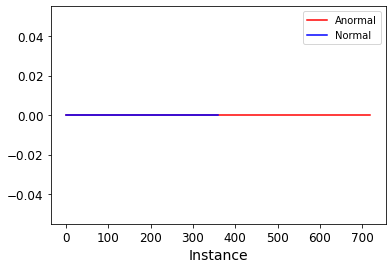

C:\Users\GJ\anaconda3\envs\2022AIComp\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0


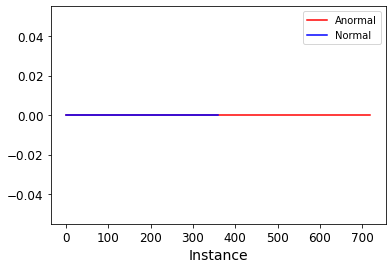

C:\Users\GJ\anaconda3\envs\2022AIComp\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0


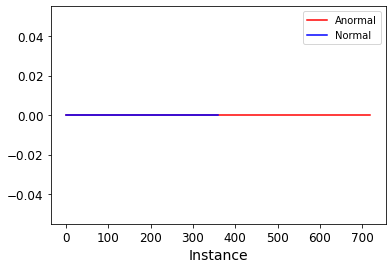

C:\Users\GJ\anaconda3\envs\2022AIComp\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0


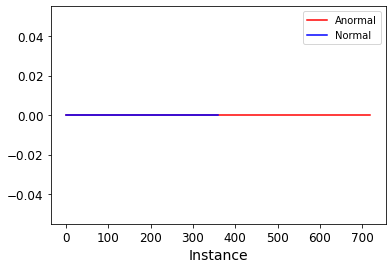

C:\Users\GJ\anaconda3\envs\2022AIComp\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0


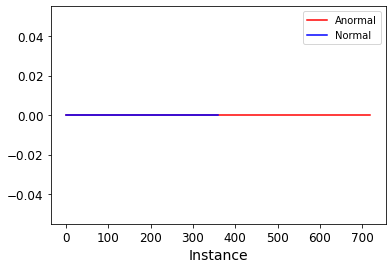

C:\Users\GJ\anaconda3\envs\2022AIComp\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
0.0


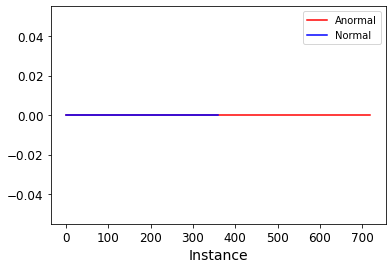

In [23]:
import statsmodels.api as sm

### threshold 결정
feature_num = sel_feature.shape[1]
# print('feature num :',feature_num)
import matplotlib.pyplot as plt

label = y_val

for i in np.arange(10,55,5):
    thresh = 0
    max_acc = 0
    max_acc_pred = []
    var_type = 'c' * feature_num
    

    std_feature = np.std(sel_feature, axis=0)
#     print(std_feature)
    d = feature_num
    train_length = sel_feature.shape[0]
    c = (4 / (d + 2) / train_length) ** (1 / (d + 4))

    pa =i
    bw = std_feature * c
#     print(bw)
    # bw = bw.transpose()

    dens = sm.nonparametric.KDEMultivariate(
        data=sel_feature, var_type=var_type, bw=bw * pa)
    file_pd = dens.pdf(pts)

    print(file_pd[:100])

    th_li = np.sort(np.unique(file_pd))
    for j in th_li:
#         print(j)
        pred = file_pd.copy()
        pred[file_pd<=j]=1
        pred[file_pd>j]=0
#         print(pred)
        acc = len(pred[pred ==label])/len(pts)
        if acc>max_acc:
            thresh = j
            max_acc = acc
            max_acc_pred = pred
    print(thresh)
    

#     print('################ pa : ', pa, ', th: ',thresh, 'acc : ')
#     get_clf_eval(y_val, max_acc_pred)        
#     f1 = f1_score(y_val, max_acc_pred)
#     print('f1 score :', f1)
    plt.plot(file_pd,'r', label = "Anormal")
    plt.plot(file_pd[:360],'b', label = "Normal")
    plt.xlabel('Instance')
    plt.legend()
    plt.show()
    
